In [86]:
# Import libaries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
# Read inflation rate data
df_inf = pd.read_csv("/content/Inflation Rates.csv")

print(df_inf.shape)
df_inf.head()

(232, 4)


,Year,Month,Annual Average Inflation,12-Month Inflation
0,2024,March,6.97,5.70
1,2024,February,7.26,6.31
2,2024,January,7.50,6.85
3,2023,December,7.67,6.63
4,2023,November,7.87,6.80


In [88]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      232 non-null    int64  
 1   Month                     232 non-null    object 
 2   Annual Average Inflation  232 non-null    float64
 3   12-Month Inflation        232 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.4+ KB


In [89]:
df_inf.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,232.000000,232.000000,232.000000
mean,2014.150862,7.726078,7.560043
std,5.567267,3.325698,3.939082
min,2005.000000,3.930000,1.850000
25%,2009.000000,5.505000,5.155000
50%,2014.000000,6.560000,6.440000
75%,2019.000000,8.537500,8.367500
max,2024.000000,17.070000,19.720000


In [90]:
av_inf_max_min = df_inf[df_inf['Annual Average Inflation'].isin([df_inf['Annual Average Inflation'].max(), df_inf['Annual Average Inflation'].min()])]
print(av_inf_max_min)

     Year    Month  Annual Average Inflation  12-Month Inflation
159  2011  January                      3.93                5.42
181  2009    March                     17.07               14.60


In [91]:
av_inf_max_min = df_inf[df_inf['12-Month Inflation'].isin([df_inf['12-Month Inflation'].max(), df_inf['12-Month Inflation'].min()])]
print(av_inf_max_min)

     Year     Month  Annual Average Inflation  12-Month Inflation
149  2011  November                     12.82               19.72
204  2007     April                      4.69                1.85


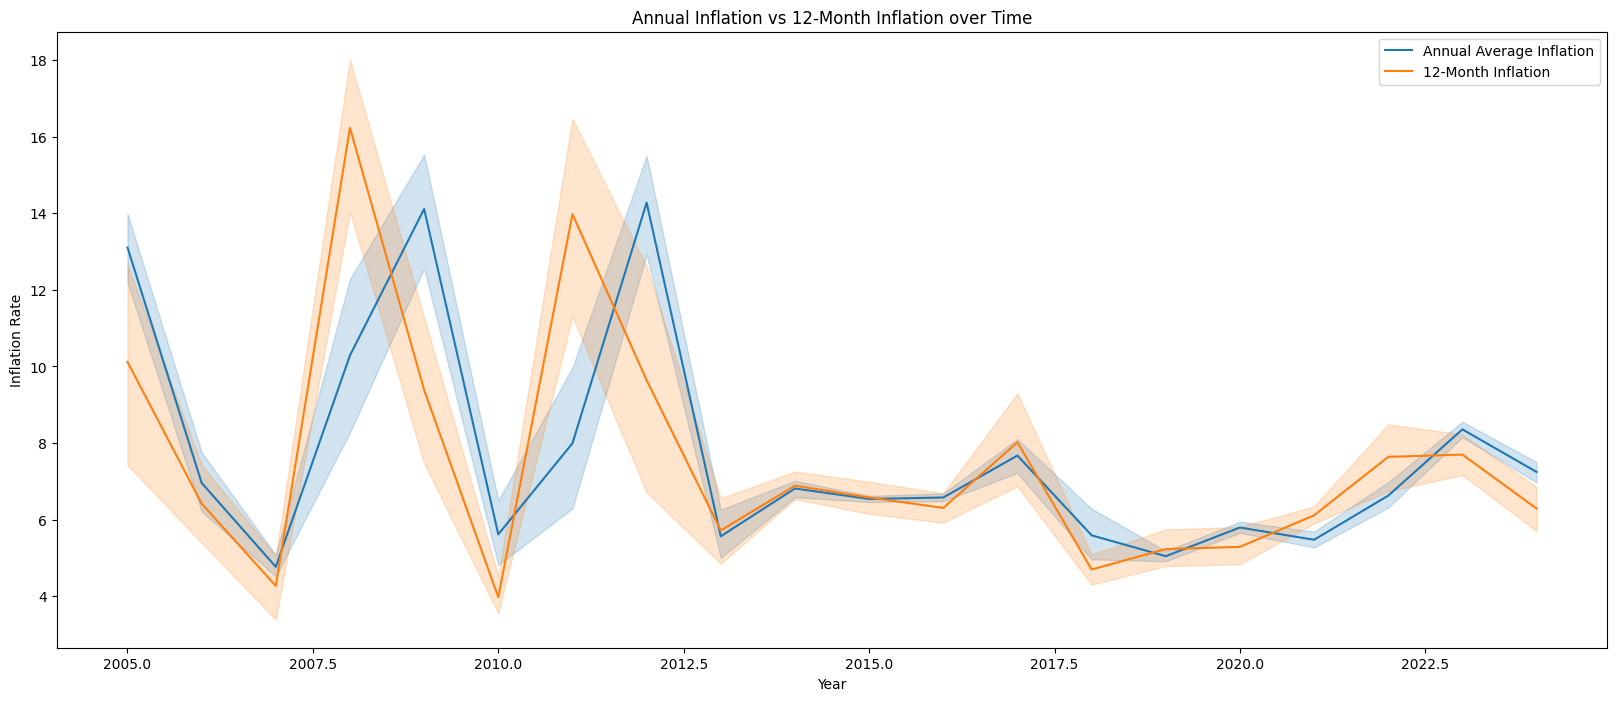

In [92]:
# Annual vs 12-Month Inflation over Time
plt.figure(figsize = (20,8))
sns.lineplot(data=df_inf, x='Year', y='Annual Average Inflation', label='Annual Average Inflation')
sns.lineplot(data=df_inf, x='Year', y='12-Month Inflation', label='12-Month Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Annual Inflation vs 12-Month Inflation over Time')
_ = plt.legend()

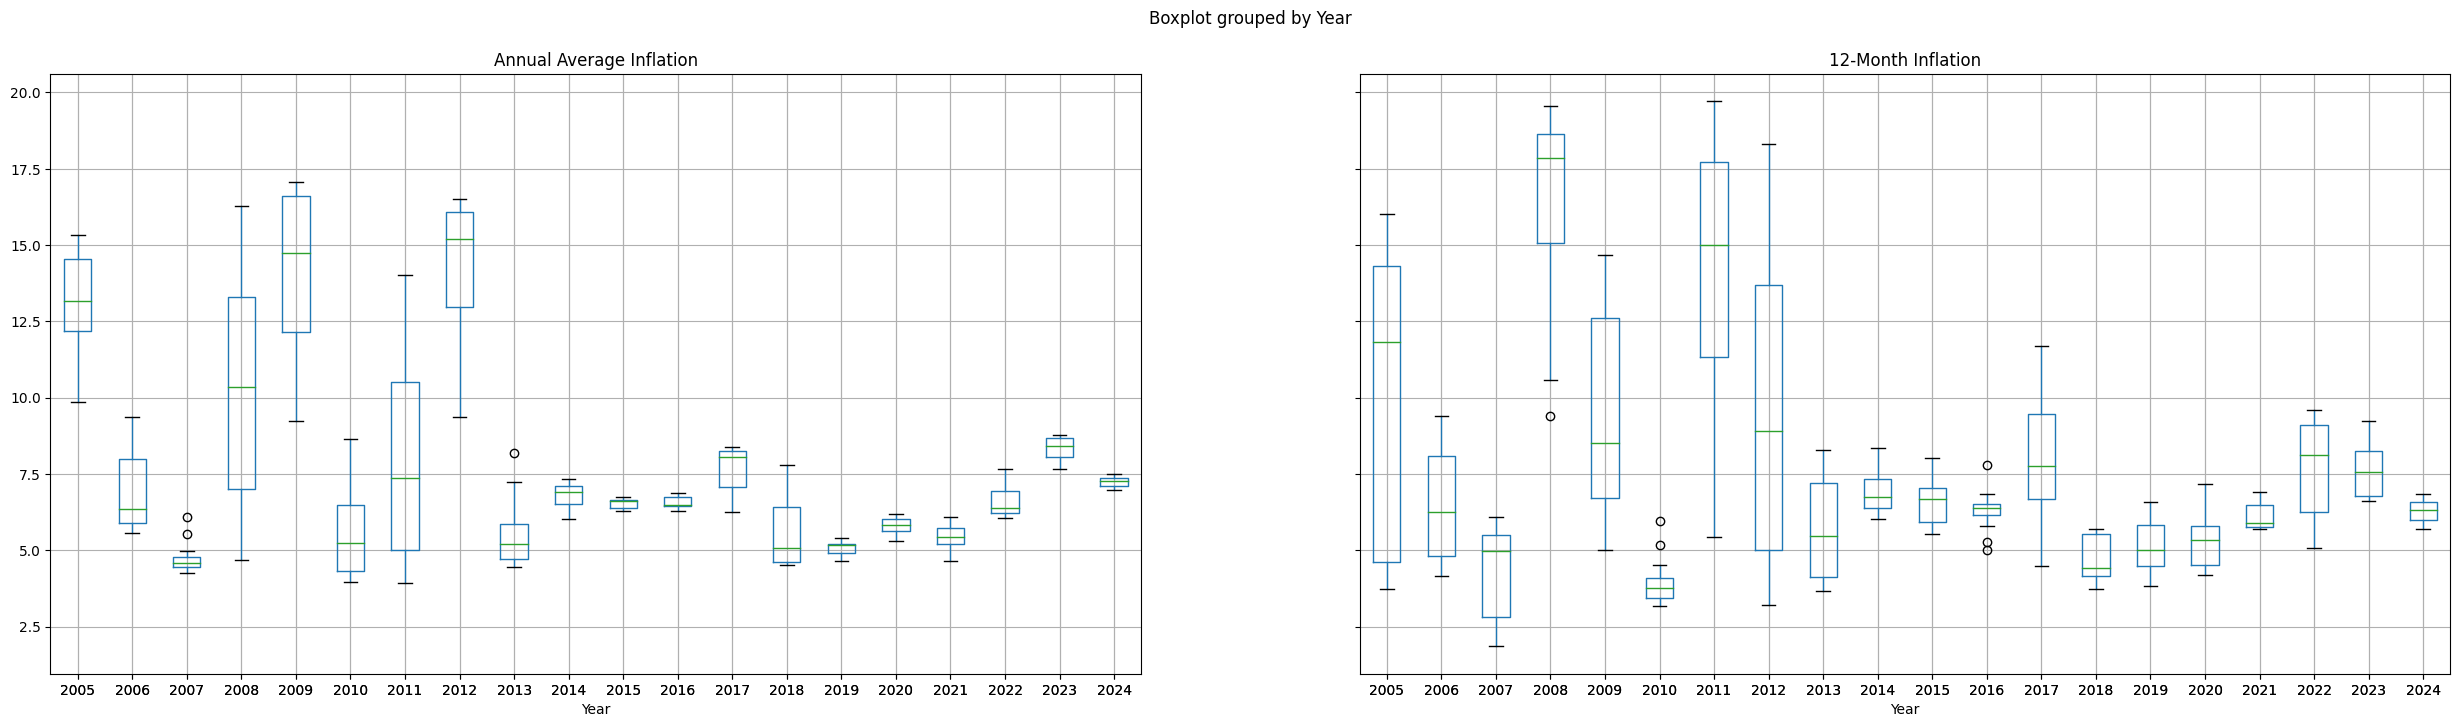

In [93]:
df_inf.boxplot(column=['Annual Average Inflation', '12-Month Inflation'], by='Year', figsize=(30, 8));

In [94]:
# Read Monthly Exchange rate data
df_exch = pd.read_csv("/content/Monthly Exchange rate (period average).csv", header=1)

print(df_exch.shape)
df_exch.head()

(375, 3)


,Year,Month,United States dollar
0,1993,1,36.23
1,1993,2,36.56
2,1993,3,43.12
3,1993,4,51.88
4,1993,5,62.16


In [95]:
df_exch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  375 non-null    int64  
 1   Month                 375 non-null    int64  
 2   United States dollar  375 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.9 KB


In [96]:
df_exch.describe()

,Year,Month,United States dollar
count,375.000000,375.000000,375.000000
mean,2008.128000,6.464000,83.402987
std,9.033783,3.466904,21.352890
min,1993.000000,1.000000,36.230000
25%,2000.000000,3.000000,69.455000
50%,2008.000000,6.000000,78.860000
75%,2016.000000,9.000000,101.085000
max,2024.000000,12.000000,159.690000


In [97]:
# Read Annual GDP data
df_gdp = pd.read_csv("/content/Annual GDP.csv")

print(df_gdp.shape)
df_gdp.head()

(24, 4)


,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2022,"13,483,003",4.8,"9,851,329"
1,2021,"12,027,662",7.6,"9,395,942"
2,2020,"10,715,070",-0.3,"8,733,060"
3,2019,"10,237,727",5.1,"8,756,946"
4,2018,"9,340,307",5.6,"8,330,891"


In [98]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 896.0+ bytes


In [99]:
# Remove non-numeric characters and convert to float
for col in ["Nominal GDP prices (Ksh Million)", "Real GDP prices (Ksh Million)"]:
    df_gdp[col] = df_gdp[col].apply(lambda x: re.sub(r'[^\d.]+', '', x))

df_gdp[["Nominal GDP prices (Ksh Million)", "Real GDP prices (Ksh Million)"]] = df_gdp[["Nominal GDP prices (Ksh Million)", "Real GDP prices (Ksh Million)"]].astype(float)

In [100]:
# Divide by 1000 to get billions
df_gdp["Nominal GDP prices (Ksh Billion)"] = df_gdp["Nominal GDP prices (Ksh Million)"] / 1000
df_gdp["Real GDP prices (Ksh Billion)"] = df_gdp["Real GDP prices (Ksh Million)"] / 1000 #

# Round off to 2dp
df_gdp["Nominal GDP prices (Ksh Billion)"] = round(df_gdp["Nominal GDP prices (Ksh Billion)"], 2)
df_gdp["Real GDP prices (Ksh Billion)"] = round(df_gdp["Real GDP prices (Ksh Billion)"], 2)

In [101]:
df_gdp.drop(columns=["Nominal GDP prices (Ksh Million)", "Real GDP prices (Ksh Million)"], inplace=True)
df_gdp.head()

,Year,Annual GDP growth (%),Nominal GDP prices (Ksh Billion),Real GDP prices (Ksh Billion)
0,2022,4.8,13483.00,9851.33
1,2021,7.6,12027.66,9395.94
2,2020,-0.3,10715.07,8733.06
3,2019,5.1,10237.73,8756.95
4,2018,5.6,9340.31,8330.89


In [103]:
df_gdp.describe()

,Year,Annual GDP growth (%),Nominal GDP prices (Ksh Billion),Real GDP prices (Ksh Billion)
count,24.000000,24.000000,24.000000,24.000000
mean,1927.208333,4.083333,4928.854167,4804.615833
std,410.547247,2.362693,4030.766588,3428.978102
min,0.000000,-0.300000,0.000000,0.000000
25%,2004.750000,2.850000,1380.447500,1156.920000
50%,2010.500000,4.700000,3880.070000,5941.860000
75%,2016.250000,5.225000,7816.395000,7666.925000
max,2022.000000,8.100000,13483.000000,9851.330000
